<a href="https://colab.research.google.com/github/shimjide123/datman/blob/main/Yu_Nong_ps1_data_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. read in at least 3 datasets in 3 different formats.

In [ ]:
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

from google.colab import files

In [ ]:
#1st dataset: indicators of World Happiness Report 2023

In [ ]:
pd.read_csv('https://github.com/shimjide123/datman/raw/main/WHR_2023.csv').head(5)

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394


In [ ]:
Happiness=pd.read_csv('https://github.com/shimjide123/datman/raw/main/WHR_2023.csv')

array([[<Axes: title={'center': 'happiness_score'}>,
        <Axes: title={'center': 'gdp_per_capita'}>,
        <Axes: title={'center': 'social_support'}>],
       [<Axes: title={'center': 'healthy_life_expectancy'}>,
        <Axes: title={'center': 'freedom_to_make_life_choices'}>,
        <Axes: title={'center': 'generosity'}>],
       [<Axes: title={'center': 'perceptions_of_corruption'}>, <Axes: >,
        <Axes: >]], dtype=object)

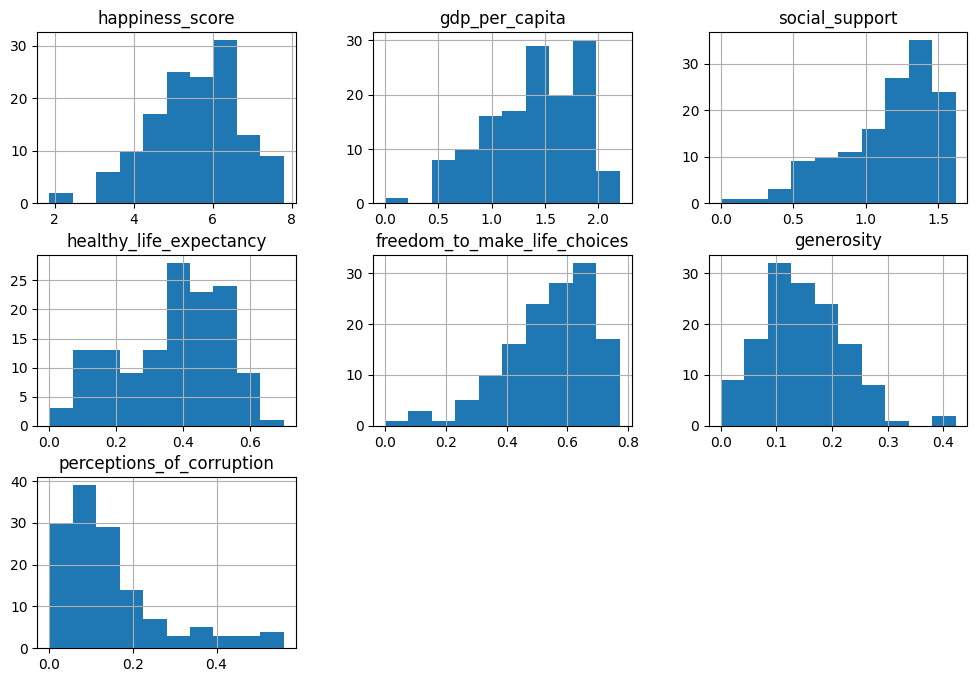

In [ ]:
Happiness.hist(figsize=(12,8))

In [ ]:
#Happiness['country'][0] #py counts from zero!
Happiness['country'][0:3]

0    Finland
1    Denmark
2    Iceland
Name: country, dtype: object

In [ ]:
max(Happiness['social_support'])

1.62

In [ ]:
max(Happiness['generosity'])

0.422

In [ ]:
Happiness.country[Happiness.social_support<1]

82                 Albania
85     Congo (Brazzaville)
88                    Laos
89                 Georgia
90                  Guinea
92             Ivory Coast
95                Cameroon
96              Mozambique
97                    Iraq
99                 Morocco
101                Senegal
102             Mauritania
103           Burkina Faso
106                  Ghana
107               Pakistan
108                  Niger
109                Tunisia
110                  Kenya
113                   Chad
115                  Benin
117             Bangladesh
118                 Gambia
119                   Mali
120                  Egypt
121                   Togo
122                 Jordan
124                Liberia
125                  India
126             Madagascar
127                 Zambia
128               Tanzania
129                Comoros
130                 Malawi
132       Congo (Kinshasa)
133               Zimbabwe
134           Sierra Leone
135                Lebanon
1

In [ ]:
Happiness.country[(Happiness.generosity<0.05) | (Happiness.generosity>0.25)]

4         Netherlands
18     United Kingdom
23            Romania
33             Kosovo
46              Japan
53         Uzbekistan
55           Portugal
57             Greece
59           Thailand
83          Indonesia
89            Georgia
91            Ukraine
93              Gabon
99            Morocco
109           Tunisia
110             Kenya
113              Chad
116           Myanmar
118            Gambia
120             Egypt
123          Ethiopia
131          Botswana
Name: country, dtype: object

In [ ]:
Happiness.query("social_support+generosity<1.6")

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
8,Luxembourg,Western Europe,7.228,2.200,1.357,0.549,0.710,0.149,0.418
10,Austria,Western Europe,7.097,1.927,1.382,0.535,0.630,0.191,0.310
15,Germany,Western Europe,6.892,1.919,1.401,0.539,0.618,0.153,0.365
16,Belgium,Western Europe,6.859,1.907,1.449,0.528,0.590,0.137,0.273
19,Lithuania,Central and Eastern Europe,6.763,1.808,1.511,0.432,0.487,0.059,0.089
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [ ]:
a=Happiness.set_index('country')

In [ ]:
a.loc['Lebanon','generosity']

0.061

In [ ]:
a.loc[a.gdp_per_capita>2,'happiness_score']

country
Switzerland             7.240
Luxembourg              7.228
Ireland                 6.911
Singapore               6.587
United Arab Emirates    6.571
Name: happiness_score, dtype: float64

In [ ]:
a.loc[["Lebanon", "Austria"]]['generosity']

country
Lebanon    0.061
Austria    0.191
Name: generosity, dtype: float64

In [ ]:
b=a.drop(index=["Lebanon", "Austria"])
len(a)

137

In [ ]:
b=a.drop(index=["Lebanon", "Austria"])
len(b)

135

In [ ]:
Happiness.shape #9 variables 137 obs

(137, 9)

In [ ]:
Happiness.dtypes

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
dtype: object

In [ ]:
Happiness.select_dtypes(include = ['float64']).head(3)

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,7.530,1.926,1.620,0.559,0.738,0.250,0.187


In [ ]:
Happiness.filter(regex='.*t$').head(2)

,social_support
0,1.585
1,1.548


In [ ]:
Happiness.country.str.contains('Austria').sum()

1

In [ ]:
Happiness.country.str.contains('.*na').sum()

11

In [ ]:
Happiness.country[0:8]

0        Finland
1        Denmark
2        Iceland
3         Israel
4    Netherlands
5         Sweden
6         Norway
7    Switzerland
Name: country, dtype: object

In [ ]:
Happiness.region[0:8]

0                  Western Europe
1                  Western Europe
2                  Western Europe
3    Middle East and North Africa
4                  Western Europe
5                  Western Europe
6                  Western Europe
7                  Western Europe
Name: region, dtype: object

In [ ]:
Happiness.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
happiness_score,137.0,5.54,1.14,1.86,4.72,5.68,6.33,7.80
gdp_per_capita,137.0,1.41,0.43,0.00,1.10,1.45,1.80,2.20
social_support,137.0,1.16,0.33,0.00,0.96,1.23,1.40,1.62
healthy_life_expectancy,136.0,0.37,0.16,0.00,0.25,0.39,0.49,0.70
freedom_to_make_life_choices,137.0,0.54,0.15,0.00,0.46,0.56,0.66,0.77
generosity,137.0,0.15,0.08,0.00,0.10,0.14,0.20,0.42
perceptions_of_corruption,137.0,0.15,0.13,0.00,0.06,0.11,0.19,0.56


In [ ]:
Happiness.groupby(['region'])['generosity'].sum()

region
Central and Eastern Europe            3.020
Commonwealth of Independent States    0.734
East Asia                             0.665
Latin America and Caribbean           2.074
Middle East and North Africa          1.390
North America and ANZ                 0.900
South Asia                            0.883
Southeast Asia                        2.104
Sub-Saharan Africa                    5.436
Western Europe                        3.135
Name: generosity, dtype: float64

In [ ]:
Happiness.groupby(['region'])[['social_support','perceptions_of_corruption']].describe().round(2)

social_support                          \
                                            count  mean   std   min   25%   
region                                                                      
Central and Eastern Europe                   22.0  1.36  0.18  0.95  1.29   
Commonwealth of Independent States            4.0  1.38  0.11  1.25  1.32   
East Asia                                     6.0  1.32  0.12  1.19  1.21   
Latin America and Caribbean                  19.0  1.26  0.12  1.04  1.18   
Middle East and North Africa                 14.0  1.08  0.30  0.48  0.97   
North America and ANZ                         4.0  1.50  0.04  1.46  1.48   
South Asia                                    6.0  0.68  0.43  0.00  0.55   
Southeast Asia                                9.0  1.15  0.15  0.85  1.11   
Sub-Saharan Africa                           33.0  0.81  0.26  0.24  0.64   
Western Europe                               20.0  1.43  0.10  1.22  1.37   

                                                      \
                                     50%   75%   max   
region                                                 
Central and Eastern Europe          1.38  1.51  1.54   
Commonwealth of Independent States  1.39  1.45  1.49   
East Asia                           1.31  1.39  1.49   
Latin America and Caribbean         1.25  1.36  1.44   
Middle East and North Africa        1.12  1.29  1.52   
North America and ANZ               1.49  1.51  1.54   
South Asia                          0.67  0.94  1.22   
Southeast Asia                      1.16  1.21  1.35   
Sub-Saharan Africa                  0.78  0.96  1.43   
Western Europe                      1.44  1.50  1.62   

                                   perceptions_of_corruption              \
                                                       count  mean   std   
region                                                                     
Central and Eastern Europe                              22.0  0.08  0.09   
Commonwealth of Independent States                       4.0  0.17  0.12   
East Asia                                                6.0  0.19  0.11   
Latin America and Caribbean                             19.0  0.10  0.07   
Middle East and North Africa                            14.0  0.12  0.07   
North America and ANZ                                    4.0  0.33  0.12   
South Asia                                               6.0  0.10  0.03   
Southeast Asia                                           9.0  0.16  0.16   
Sub-Saharan Africa                                      33.0  0.10  0.06   
Western Europe                                          20.0  0.30  0.17   

                                                                  
                                     min   25%   50%   75%   max  
region                                                            
Central and Eastern Europe          0.00  0.02  0.06  0.09  0.37  
Commonwealth of Independent States  0.02  0.12  0.18  0.23  0.29  
East Asia                           0.06  0.15  0.17  0.20  0.39  
Latin America and Caribbean         0.03  0.06  0.08  0.13  0.25  
Middle East and North Africa        0.02  0.07  0.13  0.17  0.25  
North America and ANZ               0.17  0.28  0.34  0.39  0.47  
South Asia                          0.06  0.09  0.10  0.11  0.16  
Southeast Asia                      0.01  0.05  0.12  0.16  0.56  
Sub-Saharan Africa                  0.01  0.06  0.10  0.13  0.27  
Western Europe                      0.04  0.15  0.32  0.43  0.54

In [ ]:
Happiness.sort_values(by='generosity')[['generosity','social_support']][0:10]

,generosity,social_support
89,0.000,0.947
57,0.008,1.247
46,0.009,1.396
99,0.013,0.535
131,0.021,1.041
109,0.022,0.981
55,0.031,1.356
93,0.036,1.021
120,0.038,0.972
23,0.044,1.280


<Axes: >

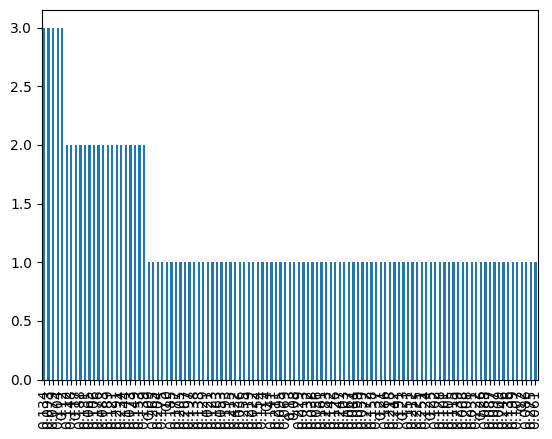

In [ ]:
Happiness['generosity'].value_counts(dropna=False).plot(kind='bar')

In [ ]:
pd.crosstab(Happiness.happiness_score,Happiness.region).head(10)

region,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
happiness_score,,,,,,,,,,
1.859,0,0,0,0,0,0,1,0,0,0
2.392,0,0,0,0,1,0,0,0,0,0
3.138,0,0,0,0,0,0,0,0,1,0
3.204,0,0,0,0,0,0,0,0,1,0
3.207,0,0,0,0,0,0,0,0,1,0
3.435,0,0,0,0,0,0,0,0,1,0
3.495,0,0,0,0,0,0,0,0,1,0
3.545,0,0,0,0,0,0,0,0,1,0
3.694,0,0,0,0,0,0,0,0,1,0


In [ ]:
pd.crosstab(Happiness.happiness_score,Happiness.region).tail(10)

region,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
happiness_score,,,,,,,,,,
7.123,0,0,0,0,0,1,0,0,0,0
7.228,0,0,0,0,0,0,0,0,0,1
7.240,0,0,0,0,0,0,0,0,0,1
7.315,0,0,0,0,0,0,0,0,0,1
7.395,0,0,0,0,0,0,0,0,0,1
7.403,0,0,0,0,0,0,0,0,0,1
7.473,0,0,0,0,1,0,0,0,0,0
7.530,0,0,0,0,0,0,0,0,0,1
7.586,0,0,0,0,0,0,0,0,0,1


In [ ]:
Happiness.groupby(by=Happiness.region)['generosity'].mean().round(2)

region
Central and Eastern Europe            0.14
Commonwealth of Independent States    0.18
East Asia                             0.11
Latin America and Caribbean           0.11
Middle East and North Africa          0.10
North America and ANZ                 0.22
South Asia                            0.15
Southeast Asia                        0.23
Sub-Saharan Africa                    0.16
Western Europe                        0.16
Name: generosity, dtype: float64

In [ ]:
pd.pivot_table(Happiness, index='region', values='generosity', aggfunc='mean').round(2)

,generosity
region,
Central and Eastern Europe,0.14
Commonwealth of Independent States,0.18
East Asia,0.11
Latin America and Caribbean,0.11
Middle East and North Africa,0.10
North America and ANZ,0.22
South Asia,0.15
Southeast Asia,0.23
Sub-Saharan Africa,0.16


In [ ]:
pd.pivot_table(Happiness, index=['happiness_score','region'], values= 'generosity' , aggfunc=['median','std','min','max']).round(1)

,,median,min,max
,,generosity,generosity,generosity
happiness_score,region,,,
1.859,South Asia,0.1,0.1,0.1
2.392,Middle East and North Africa,0.1,0.1,0.1
3.138,Sub-Saharan Africa,0.2,0.2,0.2
3.204,Sub-Saharan Africa,0.1,0.1,0.1
3.207,Sub-Saharan Africa,0.2,0.2,0.2
...,...,...,...,...
7.403,Western Europe,0.3,0.3,0.3
7.473,Middle East and North Africa,0.1,0.1,0.1


In [ ]:
Happiness[['generosity','social_support']].corr().round(2)

,generosity,social_support
generosity,1.00,0.04
social_support,0.04,1.00


In [ ]:
#2nd dataset: List of the most populous counties in the United States

In [1]:
import pandas as pd

In [3]:
pd.read_html('https://en.wikipedia.org/wiki/List_of_the_most_populous_counties_in_the_United_States',match='State')[0].head(5)

Rank       County       State Land area          April 1, 2020 census  \
  Rank       County       State    km2[5]   mi2[6] April 1, 2020 census   
0    1  Los Angeles  California  10509.87  4057.88             10014009   
1    2         Cook    Illinois   2448.38   945.33              5275541   
2    3       Harris       Texas   4411.99  1703.48              4731145   
3    4     Maricopa     Arizona  23828.26  9200.14              4420568   
4    5    San Diego  California  10895.12  4206.63              3298634   

  July 1, 2022 estimates Mid-2020 to mid-2022 change       County seat  
  July 1, 2022 estimates                    absolute    %  County seat  
0                9721138                     -292871 -2.9  Los Angeles  
1                5109292                     -166249 -3.2      Chicago  
2                4780913                       49768  1.1      Houston  
3                4551524                      130956  3.0      Phoenix  
4                3276208                      -22426 -0.7    San Diego

In [4]:
population=pd.read_html('https://en.wikipedia.org/wiki/List_of_the_most_populous_counties_in_the_United_States',match='State')[0].head(5)

array([[<Axes: title={'center': "('Rank', 'Rank')"}>,
        <Axes: title={'center': "('Land area', 'km2[5]')"}>,
        <Axes: title={'center': "('Land area', 'mi2[6]')"}>],
       [<Axes: title={'center': "('April 1, 2020 census', 'April 1, 2020 census')"}>,
        <Axes: title={'center': "('July 1, 2022 estimates', 'July 1, 2022 estimates')"}>,
        <Axes: title={'center': "('Mid-2020 to mid-2022 change', 'absolute')"}>],
       [<Axes: title={'center': "('Mid-2020 to mid-2022 change', '%')"}>,
        <Axes: >, <Axes: >]], dtype=object)

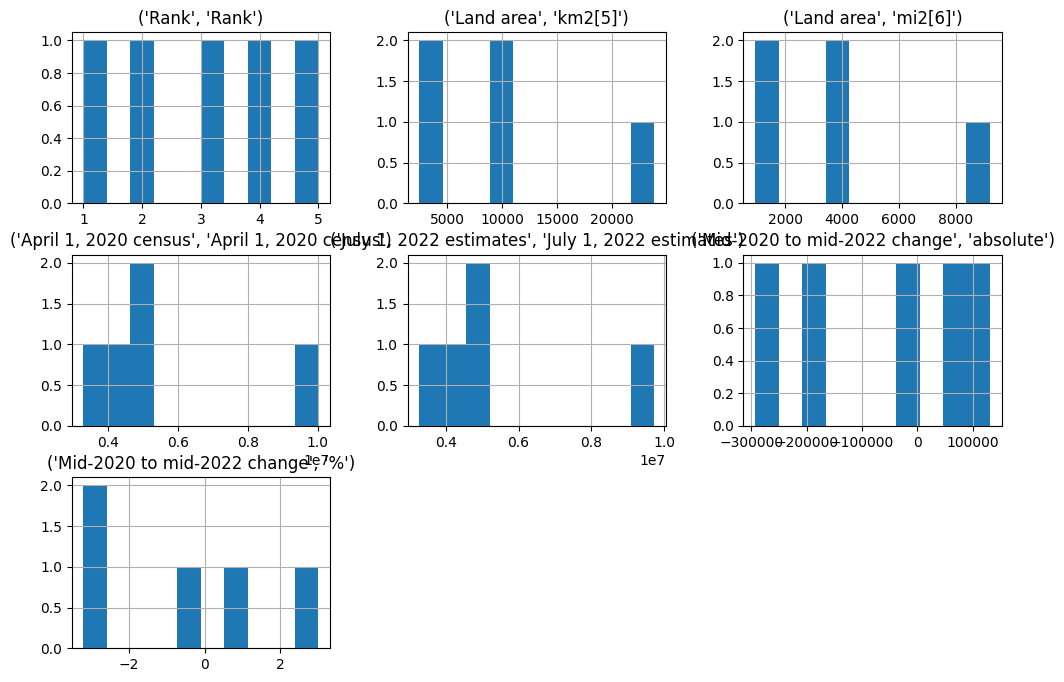

In [5]:
population.hist(figsize=(12,8))

In [6]:
population['State'][0:3]

,State
0,California
1,Illinois
2,Texas


In [14]:
population.State[(population.km2[5]<4000)|(population.km2[5]>10000)]

AttributeError: ignored

In [10]:
population.query

<bound method DataFrame.query of   Rank       County       State Land area          April 1, 2020 census  \
  Rank       County       State    km2[5]   mi2[6] April 1, 2020 census   
0    1  Los Angeles  California  10509.87  4057.88             10014009   
1    2         Cook    Illinois   2448.38   945.33              5275541   
2    3       Harris       Texas   4411.99  1703.48              4731145   
3    4     Maricopa     Arizona  23828.26  9200.14              4420568   
4    5    San Diego  California  10895.12  4206.63              3298634   

  July 1, 2022 estimates Mid-2020 to mid-2022 change       County seat  
  July 1, 2022 estimates                    absolute    %  County seat  
0                9721138                     -292871 -2.9  Los Angeles  
1                5109292                     -166249 -3.2      Chicago  
2                4780913                       49768  1.1      Houston  
3                4551524                      130956  3.0      Phoenix  
4  

In [12]:
population.dtypes

Rank                         Rank                        int64
County                       County                     object
State                        State                      object
Land area                    km2[5]                    float64
                             mi2[6]                    float64
April 1, 2020 census         April 1, 2020 census        int64
July 1, 2022 estimates       July 1, 2022 estimates      int64
Mid-2020 to mid-2022 change  absolute                    int64
                             %                         float64
County seat                  County seat                object
dtype: object

In [13]:
population.select_dtypes(include = ['float64']).head(2)

Land area          Mid-2020 to mid-2022 change
     km2[5]   mi2[6]                           %
0  10509.87  4057.88                        -2.9
1   2448.38   945.33                        -3.2

In [17]:
population.State.str.contains('Texas').sum()

AttributeError: ignored

In [18]:
population.State[0:5]

,State
0,California
1,Illinois
2,Texas
3,Arizona
4,California


In [19]:
population.describe().T.round(2)

count        mean  \
Rank                        Rank                      5.0        3.00   
Land area                   km2[5]                    5.0    10418.72   
                            mi2[6]                    5.0     4022.69   
April 1, 2020 census        April 1, 2020 census      5.0  5547979.40   
July 1, 2022 estimates      July 1, 2022 estimates    5.0  5487815.00   
Mid-2020 to mid-2022 change absolute                  5.0   -60164.40   
                            %                         5.0       -0.54   

                                                           std         min  \
Rank                        Rank                          1.58        1.00   
Land area                   km2[5]                     8361.49     2448.38   
                            mi2[6]                     3228.39      945.33   
April 1, 2020 census        April 1, 2020 census    2598916.73  3298634.00   
July 1, 2022 estimates      July 1, 2022 estimates  2466366.77  3276208.00   
Mid-2020 to mid-2022 change absolute                 169884.25  -292871.00   
                            %                             2.64       -3.20   

                                                           25%         50%  \
Rank                        Rank                          2.00        3.00   
Land area                   km2[5]                     4411.99    10509.87   
                            mi2[6]                     1703.48     4057.88   
April 1, 2020 census        April 1, 2020 census    4420568.00  4731145.00   
July 1, 2022 estimates      July 1, 2022 estimates  4551524.00  4780913.00   
Mid-2020 to mid-2022 change absolute                -166249.00   -22426.00   
                            %                            -2.90       -0.70   

                                                           75%          max  
Rank                        Rank                          4.00         5.00  
Land area                   km2[5]                    10895.12     23828.26  
                            mi2[6]                     4206.63      9200.14  
April 1, 2020 census        April 1, 2020 census    5275541.00  10014009.00  
July 1, 2022 estimates      July 1, 2022 estimates  5109292.00   9721138.00  
Mid-2020 to mid-2022 change absolute                  49768.00    130956.00  
                            %                             1.10         3.00

In [22]:
population.groupby(['County'])[['Land area']].describe().round(2)

ValueError: ignored

In [25]:
pd.pivot_table(population, index='County', values='Land area', aggfunc='mean').round(2)

ValueError: ignored